In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.constants.events import SCL5_DIVISIONS, select_scl5_regular_season
from triple_agent.reports.specific.banana_breads import (all_banana_bread_percentages,
                                                first_banana_bread_percentages,
                                                banana_split)

In [4]:
scl5_replays = get_parsed_replays(select_scl5_regular_season)

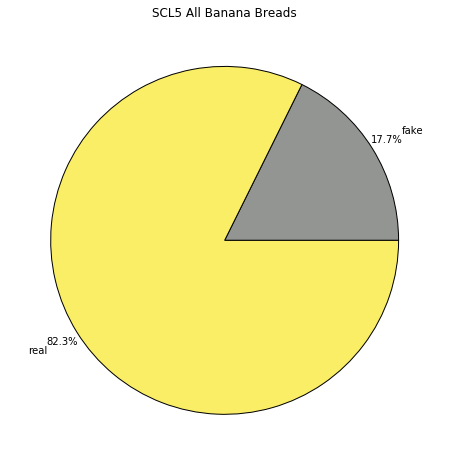

DataPlotProperties(frame=     fake  real
NaN   638  2972, stacks_are_categories=True)

In [5]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 All Banana Breads"))

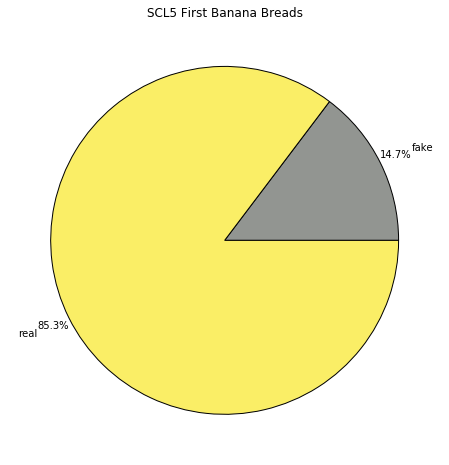

DataPlotProperties(frame=     fake  real
NaN   472  2738, stacks_are_categories=True)

In [6]:
first_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 First Banana Breads")
)

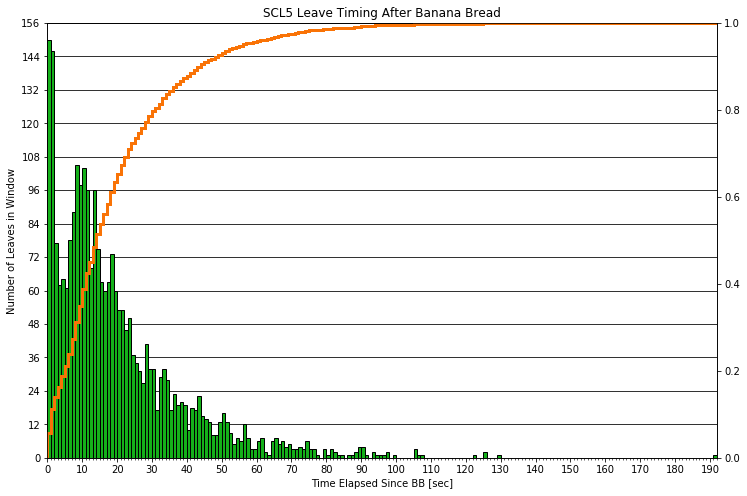

In [7]:
banana_split(scl5_replays, "SCL5 Leave Timing After Banana Bread")

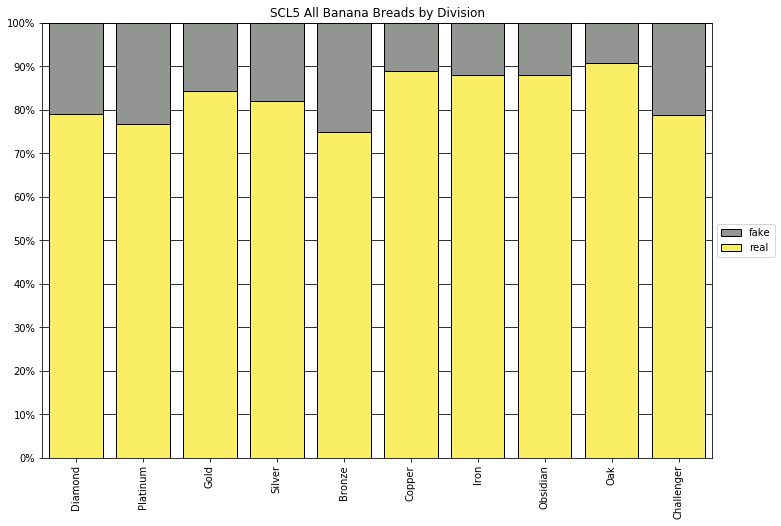

DataPlotProperties(frame=       Diamond  Platinum     Gold    Silver    Bronze    Copper      Iron  \
fake  0.209964   0.23301  0.15748  0.179221  0.250497  0.110831  0.120267   
real  0.790036   0.76699  0.84252  0.820779  0.749503  0.889169  0.879733   

      Obsidian      Oak  Challenger  
fake  0.121212  0.09375    0.212766  
real  0.878788  0.90625    0.787234  , stacks_are_categories=False)

In [8]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 All Banana Breads by Division"),
    data_query=DataQueryProperties(
        groupby=lambda g: g.division,
        secondary_order=lambda name_series: SCL5_DIVISIONS.index(name_series[0]),
        percent_normalized_data=True)
)

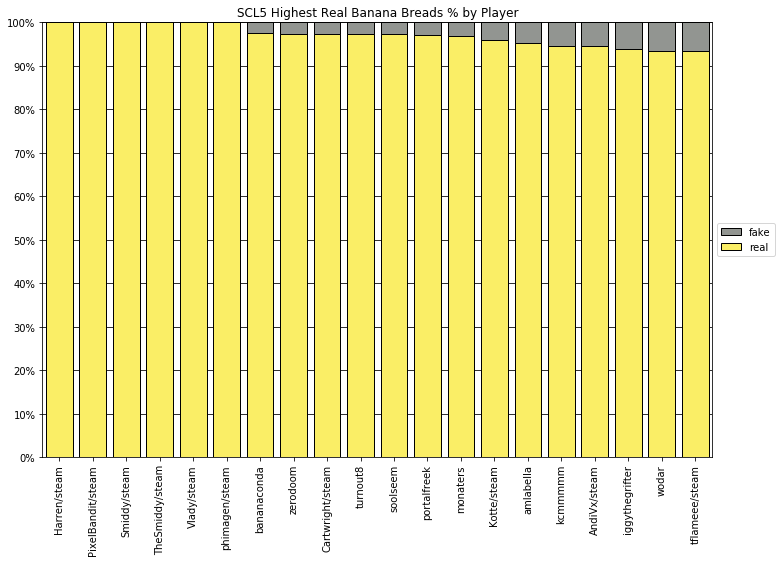

DataPlotProperties(frame=      Harren/steam  PixelBandit/steam  Smiddy/steam  TheSmiddy/steam  \
fake           0.0                0.0           0.0              0.0   
real           1.0                1.0           1.0              1.0   

      Vlady/steam  phimagen/steam  bananaconda  zerodoom  Cartwright/steam  \
fake          0.0             0.0      0.02381  0.026316          0.027027   
real          1.0             1.0      0.97619  0.973684          0.972973   

      turnout8  soolseem  portalfreek  monaters  Kotte/steam  amlabella  \
fake  0.027027  0.027778     0.029412   0.03125     0.040816   0.047619   
real  0.972973  0.972222     0.970588   0.96875     0.959184   0.952381   

       kcmmmmm  AndiVx/steam  iggythegrifter     wodar  tflameee/steam  
fake  0.054054      0.055556          0.0625  0.065217        0.066667  
real  0.945946      0.944444          0.9375  0.934783        0.933333  , stacks_are_categories=False)

In [9]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 Highest Real Banana Breads % by Player",),
    data_query=DataQueryProperties(
        groupby=lambda g: g.spy,
        percent_normalized_data=True,
        secondary_order=lambda name_series: -name_series[1]["real"],
        primary_order=["fake", "real"],
        limit=20)
)

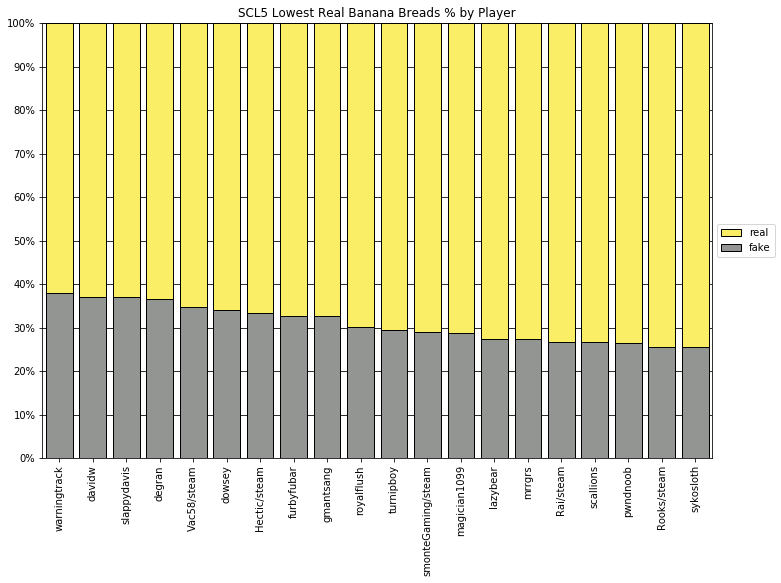

DataPlotProperties(frame=      warningtrack   davidw  slappydavis    degran  Vac58/steam    dowsey  \
real      0.621212  0.62963     0.630769  0.634921     0.653061  0.658537   
fake      0.378788  0.37037     0.369231  0.365079     0.346939  0.341463   

      Hectic/steam  furbyfubar  gmantsang  royalflush  turnipboy  \
real      0.666667    0.672727   0.673913    0.697674   0.704545   
fake      0.333333    0.327273   0.326087    0.302326   0.295455   

      smonteGaming/steam  magician1099  lazybear    mrrgrs  Rai/steam  \
real            0.711111      0.711538  0.727273  0.727273   0.733333   
fake            0.288889      0.288462  0.272727  0.272727   0.266667   

      scallions  pwndnoob  Rooks/steam  sykosloth  
real   0.733333  0.735849     0.744681   0.745098  
fake   0.266667  0.264151     0.255319   0.254902  , stacks_are_categories=False)

In [10]:
all_banana_bread_percentages(
    scl5_replays,
    axis_properties=AxisProperties(title="SCL5 Lowest Real Banana Breads % by Player",),
    data_query=DataQueryProperties(
        groupby=lambda g: g.spy,
        percent_normalized_data=True,
        secondary_order=lambda name_series: -name_series[1]["fake"],
        primary_order=["real", "fake"],
        limit=20)
)